# Resultados

In [6]:
library('dplyr')
library('ggplot2')
#install.packages('ggrepel')
library('ggrepel')
library('xtable')
library('tidyr')
library('xtable')
library('purrr')
library('readr')
#install.packages('flextable')
library('tseries')

library('nortest')

library('kableExtra')
options("scipen"=100, "digits"=4)
library('flextable')

# Reading Results

In [3]:
# reading portfolio: 
base.portfolio.ret.2000_1 <- read_rds('./base.portfolio.ret_2000_partI.rds') %>% 
    mutate(date = as.Date(date, format="%Y-%m-%d")) %>% 
    filter(sorted_by=='mean') %>% 
    filter(date < '2021-07-01')

base.portfolio.ret.2000_2 <- read_rds('./base.portfolio.ret_2000_partII.rds') %>% 
    mutate(date = as.Date(date, format="%Y-%m-%d")) %>% 
    filter(sorted_by=='mean') %>% 
    filter(date < '2021-07-01')

base.portfolio.ret.2000_3 <- read_rds('./base.portfolio.ret_2000_partIII.rds') %>% 
    mutate(date = as.Date(date, format="%Y-%m-%d")) %>% 
    filter(sorted_by=='mean') %>% 
    filter(date < '2021-07-01')

# reading cum portfolio:
base.portfolio.cum.ret.2000_1 <- read_rds('./base.portfolio.cum.ret_2000_partI.rds') %>% 
    mutate(date = as.Date(date, format="%Y-%m-%d")) %>% 
    filter(sorted_by=='mean') %>% 
    filter(date < '2021-07-01')

base.portfolio.cum.ret.2000_2 <- read_rds('./base.portfolio.cum.ret_2000_partII.rds') %>% 
    mutate(date = as.Date(date, format="%Y-%m-%d")) %>% 
    filter(sorted_by=='mean') %>% 
    filter(date < '2021-07-01')

base.portfolio.cum.ret.2000_3 <- read_rds('./base.portfolio.cum.ret_2000_partIII.rds') %>% 
    mutate(date = as.Date(date, format="%Y-%m-%d")) %>% 
    filter(sorted_by=='mean') %>% 
    filter(date < '2021-07-01')
    
# datasets union
base.portfolio.ret <- NULL
base.portfolio.cum.ret <- NULL
port.ret <- list(base.portfolio.ret.2000_1, base.portfolio.ret.2000_2, base.portfolio.ret.2000_3)
port.cum.ret <- list(base.portfolio.cum.ret.2000_1, base.portfolio.cum.ret.2000_2, base.portfolio.cum.ret.2000_3)
for(i in 1:3){
    base.portfolio.ret <- rbind(base.portfolio.ret, port.ret[[i]])
    base.portfolio.cum.ret <- rbind(base.portfolio.cum.ret, port.cum.ret[[i]])
}

colnames(base.portfolio.ret) <- c('date', 'sorted_by', 'rebalance_period', 'base', 'top', 'MV', 'MV.LM', 'MV.EW')
colnames(base.portfolio.cum.ret) <- c('date', 'sorted_by', 'rebalance_period', 'base', 'top', 'MV', 'MV.LM', 'MV.EW')


In [ ]:
#saveRDS(base.portfolio.ret, file="base.portfolio.ret_total.rds")

# Modificación

In [13]:
base.portfolio.ret <- read_rds('./base.portfolio.ret_2000_cambios.rds') %>% 
    mutate(date = as.Date(date, format="%Y-%m-%d")) %>% 
    filter(sorted_by=='mean') %>% 
    filter(date < '2021-07-01')


base.portfolio.cum.ret <- read_rds('./base.portfolio.cum.ret_2000_cambios.rds') %>% 
    mutate(date = as.Date(date, format="%Y-%m-%d")) %>% 
    filter(sorted_by=='mean') %>% 
    filter(date < '2021-07-01')

colnames(base.portfolio.ret) <- c('date', 'sorted_by', 'rebalance_period', 'base', 'top', 'MV', 'MV.LM', 'MV.EW')
colnames(base.portfolio.cum.ret) <- c('date', 'sorted_by', 'rebalance_period', 'base', 'top', 'MV', 'MV.LM', 'MV.EW')


# Modificación

In [11]:
head(base.portfolio.cum.ret)

,date,sorted_by,rebalance_period,base,top,MV,MV-LM,MV-EW
,<date>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,2007-01-03,mean,1,DJIA,6,0.0002747,0.0001536,0.0001536
2,2007-01-04,mean,1,DJIA,6,0.0290489,0.0173125,0.0173090
3,2007-01-05,mean,1,DJIA,6,-0.0031721,-0.0150521,-0.0150491
4,2007-01-08,mean,1,DJIA,6,0.0094043,-0.0069095,-0.0069081
5,2007-01-09,mean,1,DJIA,6,0.0294511,-0.0002951,-0.0002950
6,2007-01-10,mean,1,DJIA,6,0.0449311,0.0107811,0.0107790


In [14]:
# Change labels
base.portfolio.ret <- base.portfolio.ret %>% filter(date < '2021-01-01') %>% 
   mutate(base = ifelse(base == 'down', 'DJIA', 
                            ifelse(base == 'ftse100', 'FTSE100', 
                                   ifelse(base == 'dax', 'DAX', 
                                          ifelse(base == 'nasdaq', 'NASDAQ',
                                                 ifelse(base == 'sp500', 'S&P500',
                                                        ifelse(base == 'nasdaqETF', 'NASDAQ (ETFs)',
                                                               ifelse(base == 'nyse', 'NYSE', ''))))))))

base.portfolio.cum.ret <- base.portfolio.cum.ret %>% filter(date < '2021-01-01') %>% 
   mutate(base = ifelse(base == 'down', 'DJIA', 
                            ifelse(base == 'ftse100', 'FTSE100', 
                                   ifelse(base == 'dax', 'DAX', 
                                          ifelse(base == 'nasdaq', 'NASDAQ',
                                                 ifelse(base == 'sp500', 'S&P500',
                                                        ifelse(base == 'nasdaqETF', 'NASDAQ (ETFs)',
                                                               ifelse(base == 'nyse', 'NYSE', ''))))))))

$$ r_i = ln(p_t/p_{t-1}) $$ 

$$ r_p = w_i \sum_{i=1}^n r_i$$

# Analysis

Para comprobar si existe una diferencia entre las medias de las poblaciones, las suposiciones que deben cumplirse son:

- Las dos poblaciones tienen la misma varianza. Esta suposición se denomina suposición de homogeneidad de la varianza.

- Las poblaciones se distribuyen normalmente.

- Muestras aleatorias e independientes.


> ## t test

In [15]:
#*********   t test
summary.port.ret <- base.portfolio.ret %>% 
  mutate('year' = as.numeric(substring(date, 1, 4))) %>%
  select(-MV.EW) %>% 
  pivot_longer(MV:MV.LM, names_to='model', values_to='ret') %>% 
  group_by(year, base, top, model) %>% 
  summarize(mean = round(mean(ret),5),
            sd = round(sd(ret),5)) %>% 
  ungroup() %>% 
  pivot_wider(names_from = 'model', values_from=c('mean', 'sd')) %>% 
  data.frame()
  
t.test <- base.portfolio.ret %>% 
  mutate('year' = as.numeric(substring(date, 1, 4))) %>%
  select(-MV.EW) %>% 
  pivot_longer(MV:MV.LM, names_to='model', values_to='ret') %>% 
  group_by(year, base, top, model) %>% 
  summarise(ret = list(ret)) %>% 
  pivot_wider(names_from = 'model', values_from='ret') %>% 
  group_by(base, top) %>% 
  mutate(t_statistic = t.test(unlist(MV), unlist(MV.LM), var.equal=FALSE)$statistic,
         p_value = t.test(unlist(MV), unlist(MV.LM), var.equal=FALSE)$p.value) %>% 
  select(-MV, -MV.LM) %>% 
  data.frame() %>% 
  mutate('sig(5%)'= ifelse(p_value < 0.05, "*", ""),
         'sig(10%)'= ifelse(p_value < 0.10, "*", ""),
         'sig(15%)'= ifelse(p_value < 0.15, "*", ""))

table_summary <- summary.port.ret %>% 
  merge(t.test, by=c('year','base', 'top'))  %>% 
  filter(year %in% c(2007, 2008, 2009, 2018, 2019, 2020)) %>% 
  arrange(year, base, top) 

  colnames(table_summary) <- c('Year', 'Index', 'Stocks selected' ,'Mean(M1)', 'Mean(M2)', 'sd(M1)', 'sd(M2)',
                               'Statistic(t)', 'P-value', 'Sig(5%)', 'Sig(10%)', 'Sig(15%)')

`summarise()` has grouped output by 'year', 'base', 'top'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'year', 'base', 'top'. You can override using the `.groups` argument.



In [16]:
table_summary 

Year,Index,Stocks selected,Mean(M1),Mean(M2),sd(M1),sd(M2),Statistic(t),P-value,Sig(5%),Sig(10%),Sig(15%)
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2007,DAX,6,0.00121,0.00146,0.02378,0.02401,0.129101,0.8973,,,
2007,DAX,7,0.00134,0.00124,0.02031,0.02059,-0.077535,0.9382,,,
2007,DAX,8,0.00118,0.00117,0.01834,0.01782,-0.218978,0.8267,,,
2007,DAX,9,0.00113,0.00103,0.01730,0.01588,0.050652,0.9596,,,
2007,DAX,10,0.00091,0.00096,0.01517,0.01436,-0.148930,0.8816,,,
2007,DJIA,6,0.00150,0.00182,0.04062,0.04072,0.093838,0.9252,,,
2007,DJIA,7,0.00170,0.00156,0.03361,0.03491,0.141806,0.8872,,,
2007,DJIA,8,0.00057,0.00136,0.02966,0.03054,0.094624,0.9246,,,
2007,DJIA,9,0.00074,0.00121,0.02743,0.02714,0.248457,0.8038,,,


In [ ]:
# mean compariso

In [ ]:
# save table in png format
t.test <- flextable(table_summary)
t.test <- autofit(t.test)
save_as_image(t.test, path = "t.test_2007_2020.png")

> ## F test

In [17]:
#*********   F test (compare two variances)
summary.F <- base.portfolio.ret %>% 
  mutate('year' = as.numeric(substring(date, 1, 4))) %>%
  select(-MV.EW) %>% 
  pivot_longer(MV:MV.LM, names_to='model', values_to='ret') %>% 
  group_by(year, base, top) %>% 
  summarise('F_statistic'= round(var.test(ret~model,alternative='two.sided', ratio = 1)$statistic,5),
            'F_p.value'= round(var.test(ret~model,alternative='two.sided', ratio = 1)$p.value,5)) %>% 
  ungroup() %>% 
  mutate('sig'= ifelse(F_p.value < 0.05, "*", 
                      ifelse(F_p.value > 0.05 & F_p.value < 0.10, "**", 
                        ifelse(F_p.value > 0.10 & F_p.value < 0.15, "***", ""))))
         

table_summary_F <- summary.port.ret %>% 
  merge(summary.F, by=c('year','base', 'top')) %>%  
  filter(year %in% c(2007, 2008, 2009, 2018, 2019, 2020)) %>% 
  arrange(year, base, top) 

  colnames(table_summary_F) <- c('Year', 'Index', 'Stocks selected' ,'Mean(M1)', 'Mean(M2)', 'sd(M1)', 'sd(M2)',
                               'Statistic(F)', 'P-value', 'Sig.F')

`summarise()` has grouped output by 'year', 'base'. You can override using the `.groups` argument.



In [18]:
# F table result
table_summary_F

Year,Index,Stocks selected,Mean(M1),Mean(M2),sd(M1),sd(M2),Statistic(F),P-value,Sig.F
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2007,DAX,6,0.00121,0.00146,0.02378,0.02401,0.9804,0.87542,
2007,DAX,7,0.00134,0.00124,0.02031,0.02059,0.9731,0.82888,
2007,DAX,8,0.00118,0.00117,0.01834,0.01782,1.0585,0.65265,
2007,DAX,9,0.00113,0.00103,0.01730,0.01588,1.1865,0.17632,
2007,DAX,10,0.00091,0.00096,0.01517,0.01436,1.1156,0.38683,
2007,DJIA,6,0.00150,0.00182,0.04062,0.04072,0.9950,0.96863,
2007,DJIA,7,0.00170,0.00156,0.03361,0.03491,0.9270,0.54935,
2007,DJIA,8,0.00057,0.00136,0.02966,0.03054,0.9432,0.64405,
2007,DJIA,9,0.00074,0.00121,0.02743,0.02714,1.0213,0.86763,


In [ ]:
table_summary_F %>%
  kbl(format="latex",
      col.names = colnames(table_summary_F),
      align="r",
      caption="Summary Statistics of Financial Well-Being Score by Gender and Education") %>%
  kable_minimal(full_width = F,  html_font = "Source Sans Pro")

In [ ]:
# save table in png format
F.test <- flextable(table_summary_F)
F.test <- autofit(F.test)
save_as_image(F.test, path = "F.test_2007_2020.png")

> ## Autocorrelation test (Ljung-Box test)


Sometimes it is important to prove if the values of a time serie, let's say $r_t$, are independent. We can say that there is an autocorrelation pattern if the serie are serially correlated. A widely used test to verify whether a series of values are correlated is Ljung Box statistics which are based in autocorrelation as a set. Suppose we are given $m$ values autocorrelations.  We test the following joint null hypothesis about the correlations among the values
\begin{equation}
H_0 : \rho_1 = ... = \rho_k = 0
\end{equation}
with the statistic
\begin{equation}
Q  =  n(n+2) \sum_{k=1}^{m} \frac{\hat{\rho}_k^2}{(n-k)} 
\end{equation} 
where $m$ is the number of lags under test, and $\hat{\rho}_k^2$ represents $\hat{Cov} (r_t, r_{t+k})$ for $k=1,...,m$. 

For reference see Pankratz($1983$).

In [20]:
#********* Ljung-Box test for independence
Ljung.Box_test <- base.portfolio.ret %>% 
  mutate('year' = as.numeric(substring(date, 1, 4))) %>%
  select(-MV.EW) %>% 
  pivot_longer(MV:MV.LM, names_to='model', values_to='ret') %>% 
  group_by(year, base, top, model) %>% 
  summarise(ret = list(ret)) %>% 
  pivot_wider(names_from = 'model', values_from='ret') %>% 
  group_by(year, base, top) %>% 
  mutate(M1_Stat = round(Box.test(unlist(MV), lag=15, type="Ljung-Box")$statistic,4),
         M2_Stat = round(Box.test(unlist(MV.LM), lag=15, type="Ljung-Box")$statistic,4),
         M1_p.value = round(Box.test(unlist(MV), lag=15, type="Ljung-Box")$p.value,4),
         M2_p.value = round(Box.test(unlist(MV.LM), lag=15, type="Ljung-Box")$p.value,4)) %>% 
  select(-MV, -MV.LM) %>%      
  data.frame() %>% 
  mutate('M1_sig' = ifelse(M1_p.value <= 0.05, "*", 
                            ifelse(M1_p.value > 0.05 & M1_p.value <= 0.10, "**", 
                                   ifelse(M1_p.value > 0.10 & M1_p.value < 0.15, "***", ""))),
         'M2_sig' = ifelse(M2_p.value < 0.05, "*", 
                            ifelse(M2_p.value > 0.05 & M2_p.value < 0.10, "**", 
                                   ifelse(M2_p.value > 0.10 & M2_p.value < 0.15, "***", ""))))
#print(Ljung.Box_test)
colnames(Ljung.Box_test) <- c('Year', 'Index', 'Stocks selected' ,'Stat(M1)', 'Stat(M2)',
                               'P-value(M1)', 'P-value(M2)', 'Sig(M1)', 'Sig(M2)')
Ljung.Box_test

`summarise()` has grouped output by 'year', 'base', 'top'. You can override using the `.groups` argument.



Year,Index,Stocks selected,Stat(M1),Stat(M2),P-value(M1),P-value(M2),Sig(M1),Sig(M2)
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2007,DAX,6,12.644,13.61,0.6298,0.5551,,
2007,DAX,7,15.512,13.13,0.4152,0.5924,,
2007,DAX,8,12.921,13.55,0.6084,0.5595,,
2007,DAX,9,16.011,14.42,0.3813,0.4938,,
2007,DAX,10,13.427,11.17,0.5694,0.7404,,
2007,DJIA,6,21.806,25.85,0.1130,0.0396,***,*
2007,DJIA,7,18.786,25.84,0.2236,0.0398,,*
2007,DJIA,8,19.558,25.84,0.1896,0.0397,,*
2007,DJIA,9,16.240,25.84,0.3663,0.0398,,*


In [75]:
Ljung.Box_table <- Ljung.Box_test %>%
  filter(Year %in% c(2007:2009, 2018:2020)) %>% 
  kbl(format="latex",
      col.names = colnames(Ljung.Box_test),
      align="r",
      caption="Ljung.Box_test", digits=3) %>%
  kable_minimal(full_width = F,  html_font = "Source Sans Pro")

In [21]:
# 'Year', 'Index', 'Stocks selected' ,'Mean(M1)'
table_summary_F_and_Ljung <- merge(table_summary_F, Ljung.Box_test, by=c('Year', 'Index', 'Stocks selected')) %>% 
       select(Year:'Mean(M1)', 'sd(M1)', 'Stat(M1)', 'P-value(M1)', 'Sig(M1)',   'Mean(M2)', 'sd(M2)', 'Stat(M2)', 'P-value(M2)', 'Sig(M2)', 'Statistic(F)', 'P-value', 'Sig.F') %>% 
       arrange(Year, Index, across(starts_with('Stocks')))
head(table_summary_F_and_Ljung)



,Year,Index,Stocks selected,Mean(M1),sd(M1),Stat(M1),P-value(M1),Sig(M1),Mean(M2),sd(M2),Stat(M2),P-value(M2),Sig(M2),Statistic(F),P-value,Sig.F
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
1,2007,DAX,6,0.00121,0.02378,12.64,0.6298,,0.00146,0.02401,13.61,0.5551,,0.9804,0.8754,
2,2007,DAX,7,0.00134,0.02031,15.51,0.4152,,0.00124,0.02059,13.13,0.5924,,0.9731,0.8289,
3,2007,DAX,8,0.00118,0.01834,12.92,0.6084,,0.00117,0.01782,13.55,0.5595,,1.0585,0.6526,
4,2007,DAX,9,0.00113,0.01730,16.01,0.3813,,0.00103,0.01588,14.42,0.4938,,1.1865,0.1763,
5,2007,DAX,10,0.00091,0.01517,13.43,0.5694,,0.00096,0.01436,11.17,0.7404,,1.1156,0.3868,
6,2007,DJIA,6,0.00150,0.04062,21.81,0.1130,***,0.00182,0.04072,25.85,0.0396,*,0.9950,0.9686,


In [22]:
Ljung.Box_table <- table_summary_F_and_Ljung %>%
  filter(Year %in% c(2007:2009, 2018:2020)) %>% 
  kbl(format="latex",
      col.names = colnames(table_summary_F_and_Ljung),
      align="r",
      caption="Ljung.Box_test", digits=3) %>%
  kable_minimal(full_width = F,  html_font = "Source Sans Pro")

In [ ]:
Ljung.Box_table

> ## Augmented Dickey-Fuller test (ADF)



- H_0 :  existencia de raíz unitaria (serie no estacionaria)
- H_a :  no existencia de raíz unitaria (serie estacionaria)

In [ ]:
# prueba de ADF
ADF_test <- base.portfolio.ret %>% 
  mutate('year' = as.numeric(substring(date, 1, 4))) %>%
  select(-MV.EW) %>% 
  pivot_longer(MV:MV.LM, names_to='model', values_to='ret') %>% 
  group_by(year, base, top, model) %>% 
  summarise(ret = list(ret)) %>% 
  pivot_wider(names_from = 'model', values_from='ret') %>% 
  group_by(year, base, top) %>% 
  mutate(M1_Stat = round(adf.test(unlist(MV))$statistic,4),
         M2_Stat = round(adf.test(unlist(MV.LM))$statistic,4),
         M1_p.value = round(adf.test(unlist(MV))$p.value,4),
         M2_p.value = round(adf.test(unlist(MV.LM))$p.value,4)) %>% 
  select(-MV, -MV.LM) %>%      
  data.frame() %>% 
  mutate('M1_sig(5%)' = ifelse( M1_p.value < 0.05, "*", ""),
         'M1_sig(10%)' = ifelse( M1_p.value < 0.10, "*", ""),
         'M2_sig(5%)' = ifelse( M2_p.value < 0.05, "*", ""),
         'M2_sig(10%)' = ifelse( M2_p.value < 0.10, "*", ""))

colnames(ADF_test) <- c('Year', 'Index', 'Stocks selected' ,'Statistic (M1)', 'Statistic (M2)',
                        'P-value (M1)', 'P-value (M2)', 'Sig(5%)(M1)', 'Sig(10%)(M1)', 
                        'Sig(5%)(M2)', 'Sig(10%)(M2)')
ADF_test

# Box Plot

In [24]:
base.port.ret.by_year <- base.portfolio.ret %>% 
    mutate('year'=as.numeric(substring(date,1,4))) %>% 
    select(-date, -sorted_by, -rebalance_period, -MV.EW) %>% 
    rename(Index=base, 'Stocks_Selected'=top, M1=MV, M2=MV.LM, Year=year)
 
head(base.port.ret.by_year)

,Index,Stocks_Selected,M1,M2,Year
,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,DJIA,6,0.0002747,0.0001536,2007
2,DJIA,6,0.0287742,0.0171588,2007
3,DJIA,6,-0.0322210,-0.0323645,2007
4,DJIA,6,0.0125763,0.0081426,2007
5,DJIA,6,0.0200468,0.0066145,2007
6,DJIA,6,0.0154800,0.0110762,2007


In [25]:
base.ret <- base.port.ret.by_year %>%
  gather(key='Modelo',value='portfolio.return',-Year,-Stocks_Selected,-Index) %>% 
  group_by(Year, Index, Stocks_Selected, Modelo) %>% 
  summarize('mean'=mean(portfolio.return),
            'sd' = sd(portfolio.return),
            'sr' = mean/sd) %>%
  ungroup() %>%
  data.frame() %>% 
  arrange(Year, Index, Stocks_Selected, desc(sr)) %>% 
  filter(Modelo != 'MV.EW')


`summarise()` has grouped output by 'Year', 'Index', 'Stocks_Selected'. You can override using the `.groups` argument.



In [26]:
head(base.ret)

,Year,Index,Stocks_Selected,Modelo,mean,sd,sr
,<dbl>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,2007,DAX,6,M2,0.001461,0.02401,0.06084
2,2007,DAX,6,M1,0.001206,0.02378,0.05072
3,2007,DAX,7,M1,0.001344,0.02031,0.06617
4,2007,DAX,7,M2,0.001240,0.02059,0.06021
5,2007,DAX,8,M2,0.001174,0.01782,0.06587
6,2007,DAX,8,M1,0.001183,0.01834,0.06452


> ## Period: 2007-2009

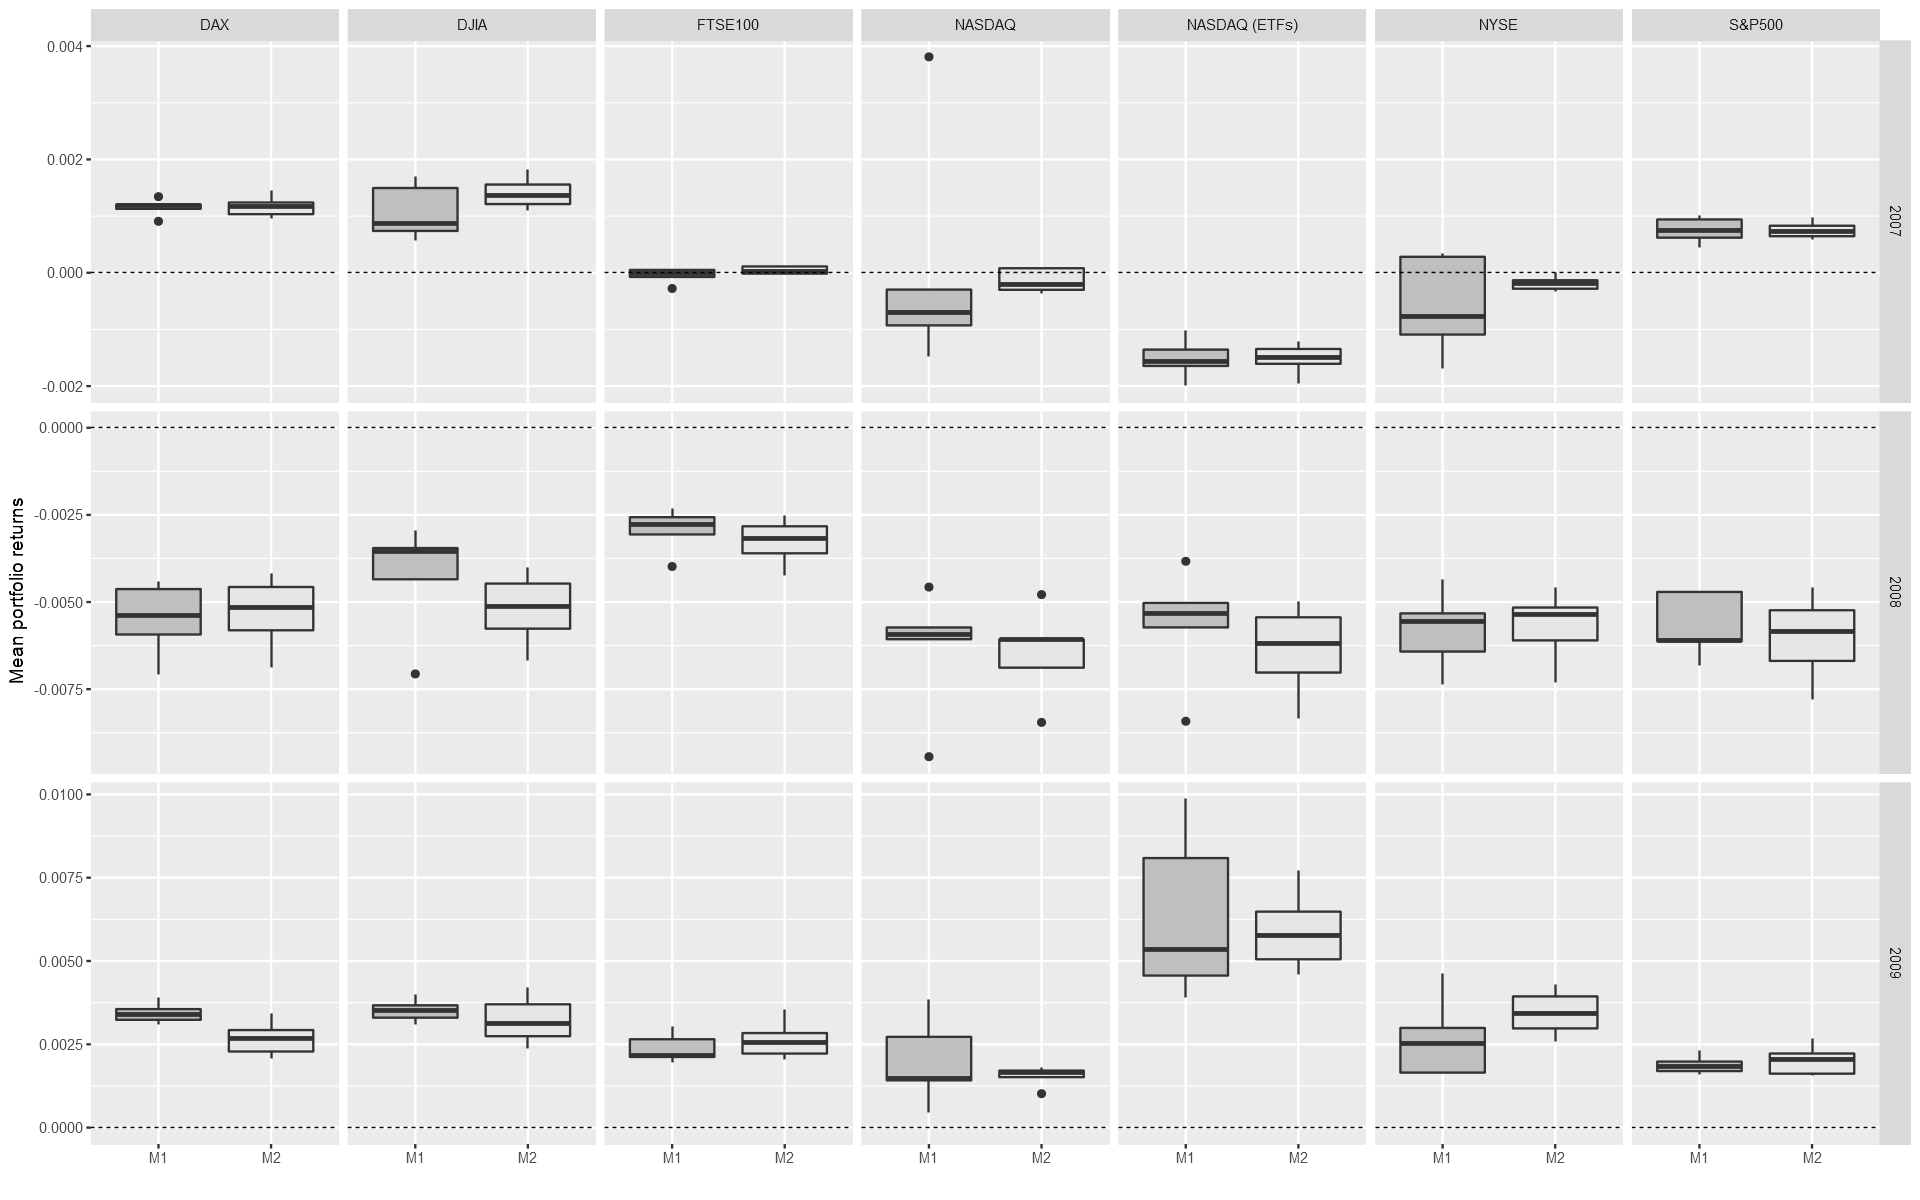

In [31]:
options(repr.plot.width=16, repr.plot.height=10)
b1 <- ggplot(base.ret %>% filter(Year %in% c(2007, 2008, 2009)), aes(x=Modelo, y=mean, fill=Modelo)) +
  geom_boxplot() +
  #stat_summary(fun.y="mean", color='blue') +
  geom_hline(yintercept=0, linetype="dashed", color = "black", size=0.3) +
  facet_grid(col=vars(Index), row=vars(Year), scale='free') +
  labs(y="Mean portfolio returns", x="") +
  #labs(y="Mean portfolio returns", x="", caption='Training period : last 7 years \n
  #                                                Testing period : 2007.01-2019.12 \n
  #                                                Rolling window : 1 month') +
  #theme_minimal()+
  theme(legend.position="none",
        legend.box = "horizontal",
        legend.title = element_blank()) +
  scale_fill_grey(start=0.75, end=0.9)
b1

In [32]:
png(file="Boxplot_2007_to_2009_cambios.png",width=1000, height=600)
b1
dev.off()

png 
  2

> ## Period: 2018-2020

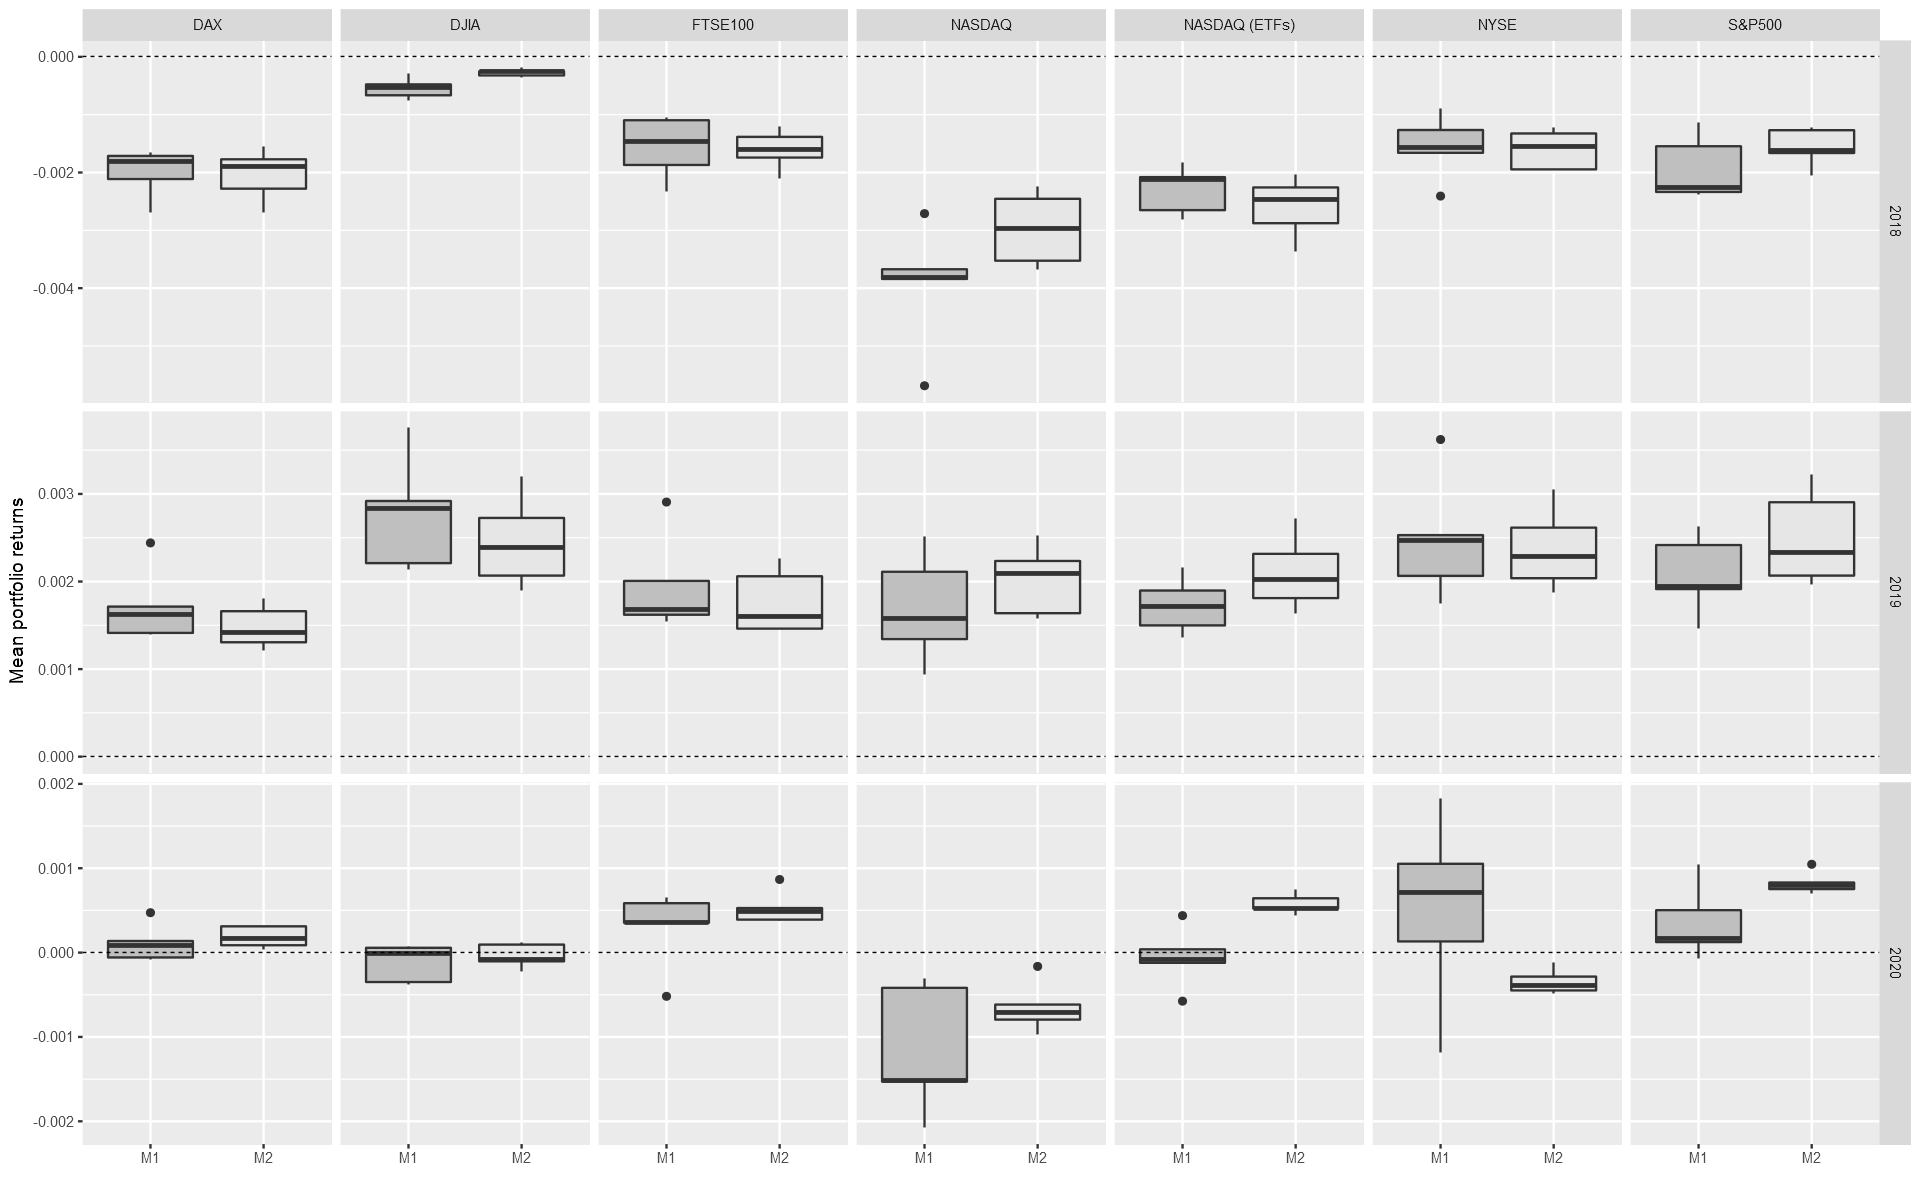

In [33]:
options(repr.plot.width=16, repr.plot.height=10)
b2 <- ggplot(base.ret %>% filter(Year %in% c(2018, 2019, 2020)), aes(x=Modelo, y=mean, fill=Modelo)) +
  geom_boxplot() +
  #stat_summary(fun.y="mean", color='blue') +
  geom_hline(yintercept=0, linetype="dashed", color = "black", size=0.3) +
  facet_grid(col=vars(Index), row=vars(Year), scale='free') +
  labs(y="Mean portfolio returns", x="") +
  #labs(y="Mean portfolio returns", x="", caption='Training period : last 7 years \n
  #                                                Testing period : 2018.01-2020.12 \n
  #                                                Rolling window : 1 month') +
  theme(legend.position="none",
        legend.box = "horizontal",
        legend.title = element_blank()) +
  scale_fill_grey(start=0.75, end=0.9)
b2

In [34]:
png(file="Boxplot_2018_to_2020_cambios.png", width=1000, height=600)
b2
dev.off()

png 
  2

# Sharpe Ratio

In [35]:
# Sharpe ratio
base_sharpe_ratio <- base.portfolio.ret %>% 
    select(-sorted_by, -rebalance_period, -MV.EW) %>% 
    mutate(date = as.Date(paste(substring(date, 1, 7), '01', sep='-'))) %>% 
    group_by(date, base, top) %>% 
    summarize(port.MV.mean=mean(MV),
              port.MV.sd=sd(MV),
              port.LM.mean= mean(MV.LM),
              port.LM.sd= sd(MV.LM)) %>% 
    ungroup() %>% 
    mutate(M1 = port.MV.mean/port.MV.sd,
           M2 = port.LM.mean/port.LM.sd) %>% 
    select(date, base, top, M1, M2) %>% 
    mutate('Year'=as.numeric(substring(date,1,4))) %>% 
    rename(Date=date, Index=base, Stocks_Selected=top) %>% 
    pivot_longer(M1:M2, names_to='Model', values_to='Sharpe.Ratio')

head(base_sharpe_ratio)

`summarise()` has grouped output by 'date', 'base'. You can override using the `.groups` argument.



Date,Index,Stocks_Selected,Year,Model,Sharpe.Ratio
<date>,<chr>,<int>,<dbl>,<chr>,<dbl>
2007-01-01,DAX,6,2007,M1,0.1934
2007-01-01,DAX,6,2007,M2,0.2139
2007-01-01,DAX,7,2007,M1,0.2894
2007-01-01,DAX,7,2007,M2,0.2139
2007-01-01,DAX,8,2007,M1,0.2417
2007-01-01,DAX,8,2007,M2,0.2139


In [36]:
# Montly Sharpe Ratio by year
base_mean_sr <- base_sharpe_ratio %>% 
    group_by(Index, Stocks_Selected, Year, Model) %>% 
    summarize(Mean.Sharpe.Ratio= round(mean(Sharpe.Ratio),3)) %>% 
    pivot_wider(names_from='Model', values_from='Mean.Sharpe.Ratio') %>% 
    filter(Year %in% c(2007:2009, 2018:2020)) %>% 
    pivot_wider(names_from='Year', values_from=c('M1', 'M2')) %>% 
    select(Index, Stocks_Selected, M1_2007, M2_2007, M1_2008, M2_2008, M1_2009, M2_2009, M1_2018, M2_2018, M1_2019, M2_2019, M1_2020, M2_2020) 
head(base_mean_sr)

`summarise()` has grouped output by 'Index', 'Stocks_Selected', 'Year'. You can override using the `.groups` argument.



Index,Stocks_Selected,M1_2007,M2_2007,M1_2008,M2_2008,M1_2009,M2_2009,M1_2018,M2_2018,M1_2019,M2_2019,M1_2020,M2_2020
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DAX,6,0.088,0.092,-0.099,-0.095,0.129,0.222,-0.079,-0.083,0.123,0.096,0.019,0.029
DAX,7,0.099,0.092,-0.100,-0.092,0.668,0.206,-0.087,-0.082,0.108,0.099,0.027,0.029
DAX,8,0.097,0.098,-0.100,-0.093,0.157,0.216,-0.080,-0.080,0.098,0.100,0.028,0.029
DAX,9,0.095,0.089,-0.096,-0.093,0.119,0.234,-0.082,-0.084,0.105,0.100,0.031,0.035
DAX,10,0.095,0.099,-0.101,-0.094,0.366,0.184,-0.088,-0.081,0.122,0.103,0.042,0.042
DJIA,6,0.075,0.086,-0.068,-0.061,0.085,0.093,0.080,0.073,0.172,0.160,0.023,0.029


In [ ]:
SharpeRatio_table_2007.2020 <- base_mean_sr %>%
  kbl(format="latex",
      col.names = colnames(base_mean_sr),
      align="r",
      caption="Average annual Sharpe ratio") %>%
  kable_minimal(full_width = F,  html_font = "Source Sans Pro")
  SharpeRatio_table_2007.2020

In [38]:
# Montly Sharpe Ratio by year
base_mean_sr <- base_sharpe_ratio %>% 
    group_by(Index, Stocks_Selected, Year, Model) %>% 
    summarize(Mean.Sharpe.Ratio= mean(Sharpe.Ratio)) %>% 
    pivot_wider(names_from='Model', values_from='Mean.Sharpe.Ratio') %>% 
    filter(Year %in% c(2018:2020)) %>% 
    pivot_wider(names_from='Year', values_from=c('M1', 'M2')) %>% 
    select(Index, Stocks_Selected, M1_2018, M2_2018, M1_2019, M2_2019, M1_2020, M2_2020) 
head(base_mean_sr)

`summarise()` has grouped output by 'Index', 'Stocks_Selected', 'Year'. You can override using the `.groups` argument.



Index,Stocks_Selected,M1_2018,M2_2018,M1_2019,M2_2019,M1_2020,M2_2020
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DAX,6,-0.07857,-0.08318,0.12338,0.09579,0.01890,0.02923
DAX,7,-0.08655,-0.08211,0.10753,0.09908,0.02699,0.02892
DAX,8,-0.07998,-0.07978,0.09781,0.10043,0.02819,0.02884
DAX,9,-0.08223,-0.08416,0.10527,0.10034,0.03098,0.03482
DAX,10,-0.08774,-0.08057,0.12218,0.10334,0.04176,0.04217
DJIA,6,0.08011,0.07324,0.17191,0.16049,0.02309,0.02919


In [ ]:
SharpeRatio_table_2018.2020 <- base_mean_sr %>%
  kbl(format="latex",
      col.names = colnames(base_mean_sr),
      align="r",
      caption="Average annual Sharpe ratio") %>%
  kable_minimal(full_width = F,  html_font = "Source Sans Pro")
  SharpeRatio_table_2018.2020

In [ ]:
SharpeRatio_table_2018.2020 <- base_mean_sr %>%
  kbl(format="latex",
      col.names = colnames(base_mean_sr),
      align="r",
      caption="Average annual Sharpe ratio") %>%
  kable_minimal(full_width = F,  html_font = "Source Sans Pro")
  SharpeRatio_table_2018.2020

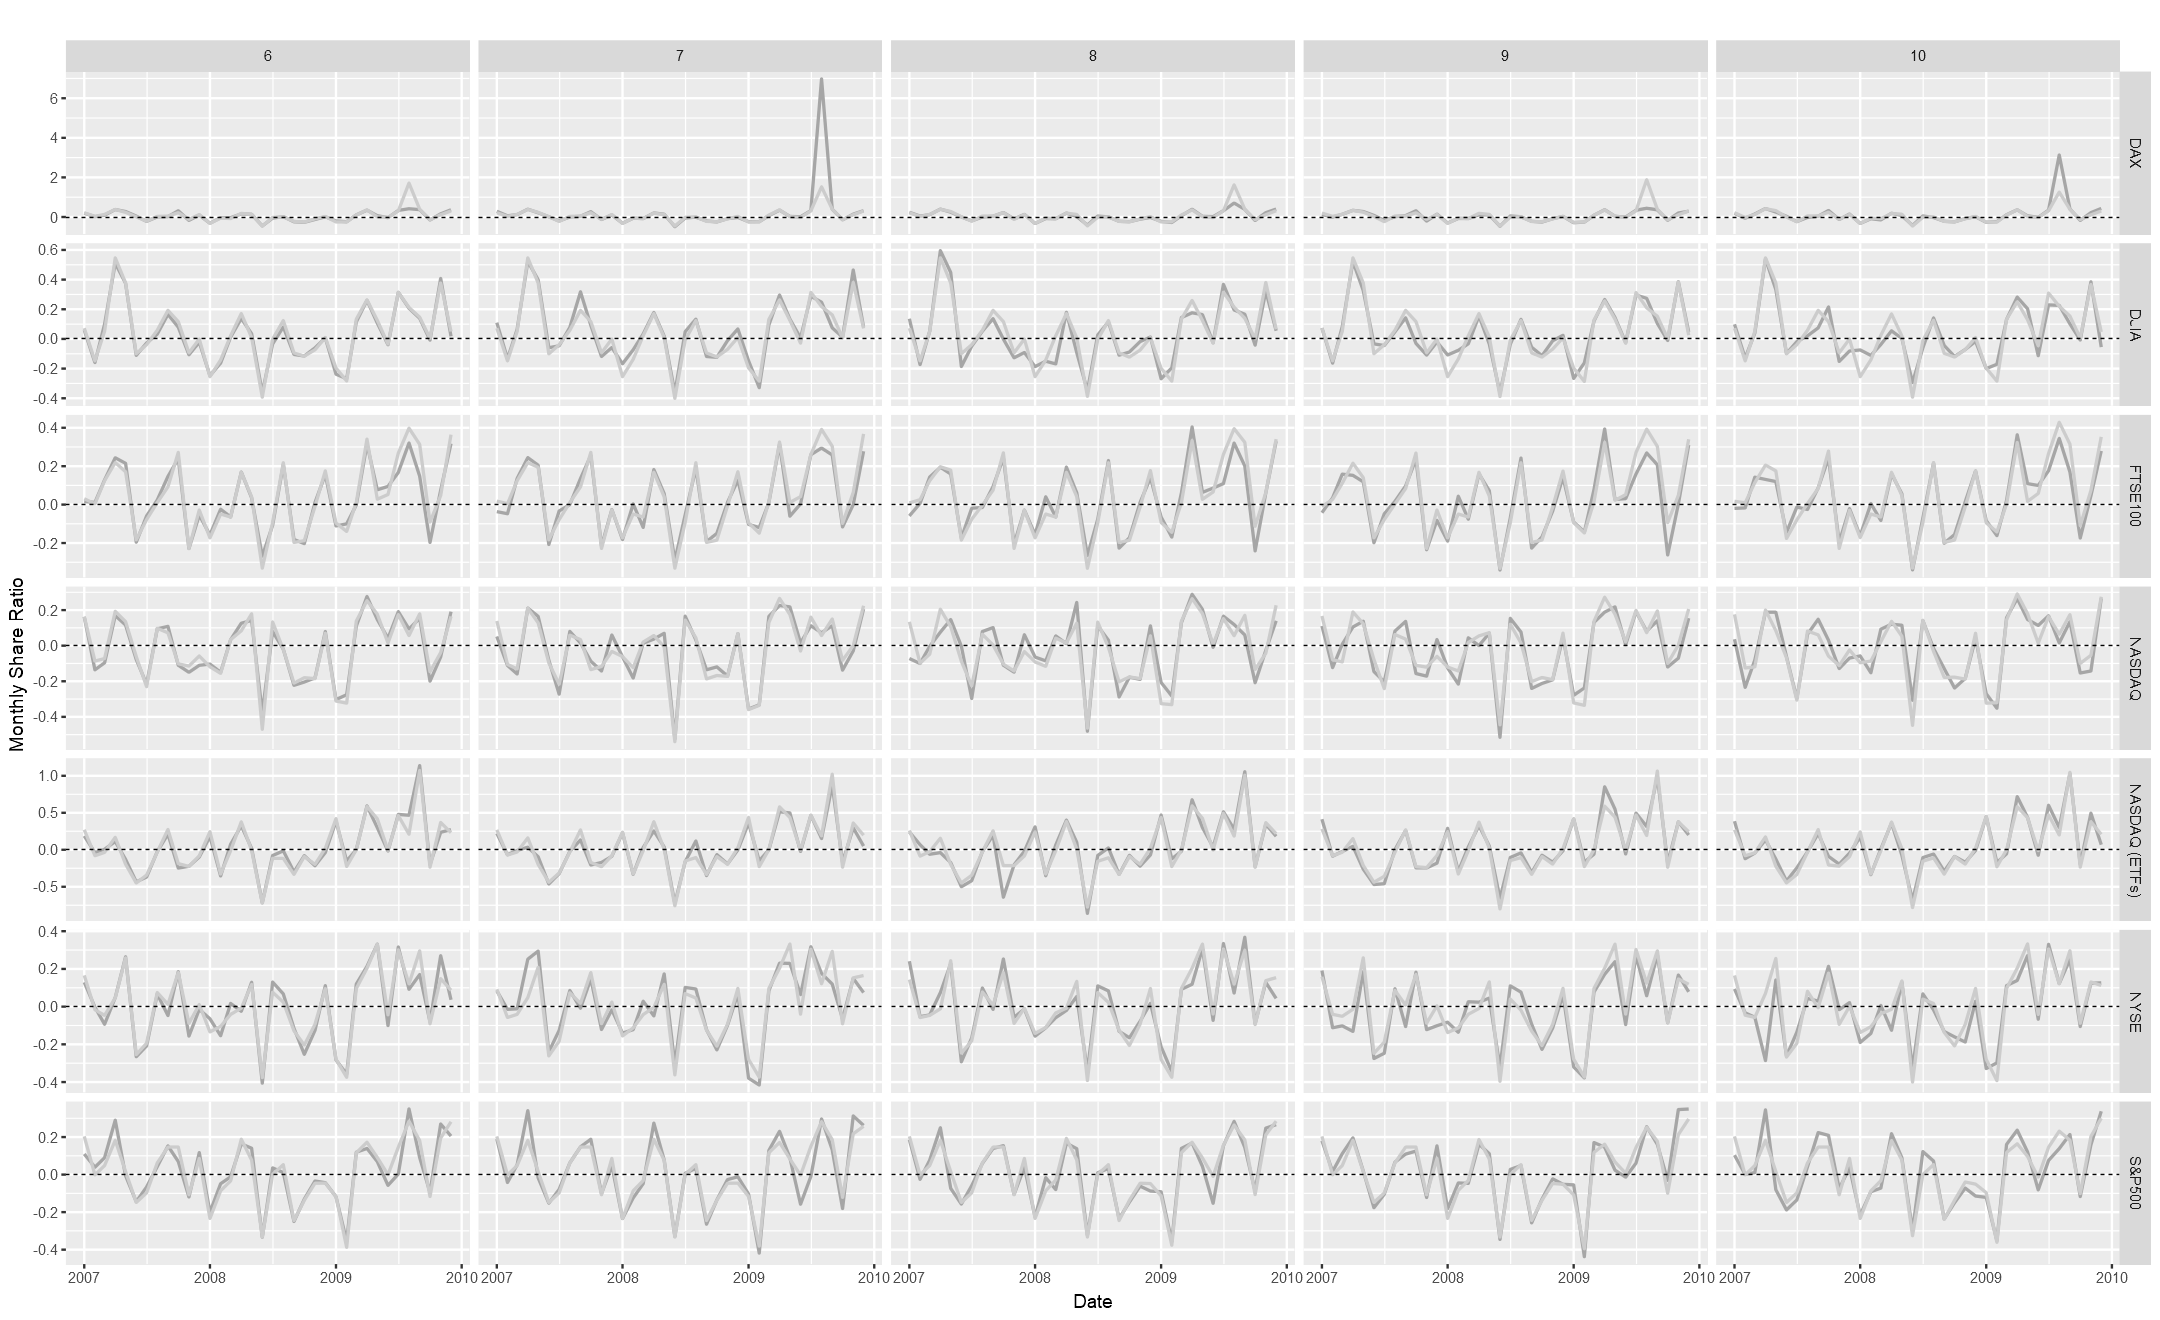

In [57]:
options(repr.plot.width=18, repr.plot.height=11)
p1 <- ggplot(base_sharpe_ratio %>% filter(Year %in% c(2007,2008, 2009))  , aes(x=Date,y=Sharpe.Ratio,color=Model) )+
  geom_line(size=0.7) +
  #theme_minimal() +
  geom_hline(yintercept=0, linetype="dashed", color = "black", size=0.3) +
  #theme(legend.position="bottom",
  #      legend.title = element_blank(),
  #      legend.text = element_text(colour="black", size=12)) +
  labs(title="",x='Date',y='Monthly Share Ratio') +
  #facet_grid(top ~ .) 
  facet_grid(col=vars(Stocks_Selected), row=vars(Index), scale="free") +
  theme(legend.position="none",
        legend.box = "horizontal",
        legend.title = element_blank()) +
  scale_color_grey(start=0.65, end=0.8)
p1

In [58]:
png(file="Montly_SR_2007_to_2009_V2_cambios.png", width=1000, height=600)
p1
dev.off()

png 
  2

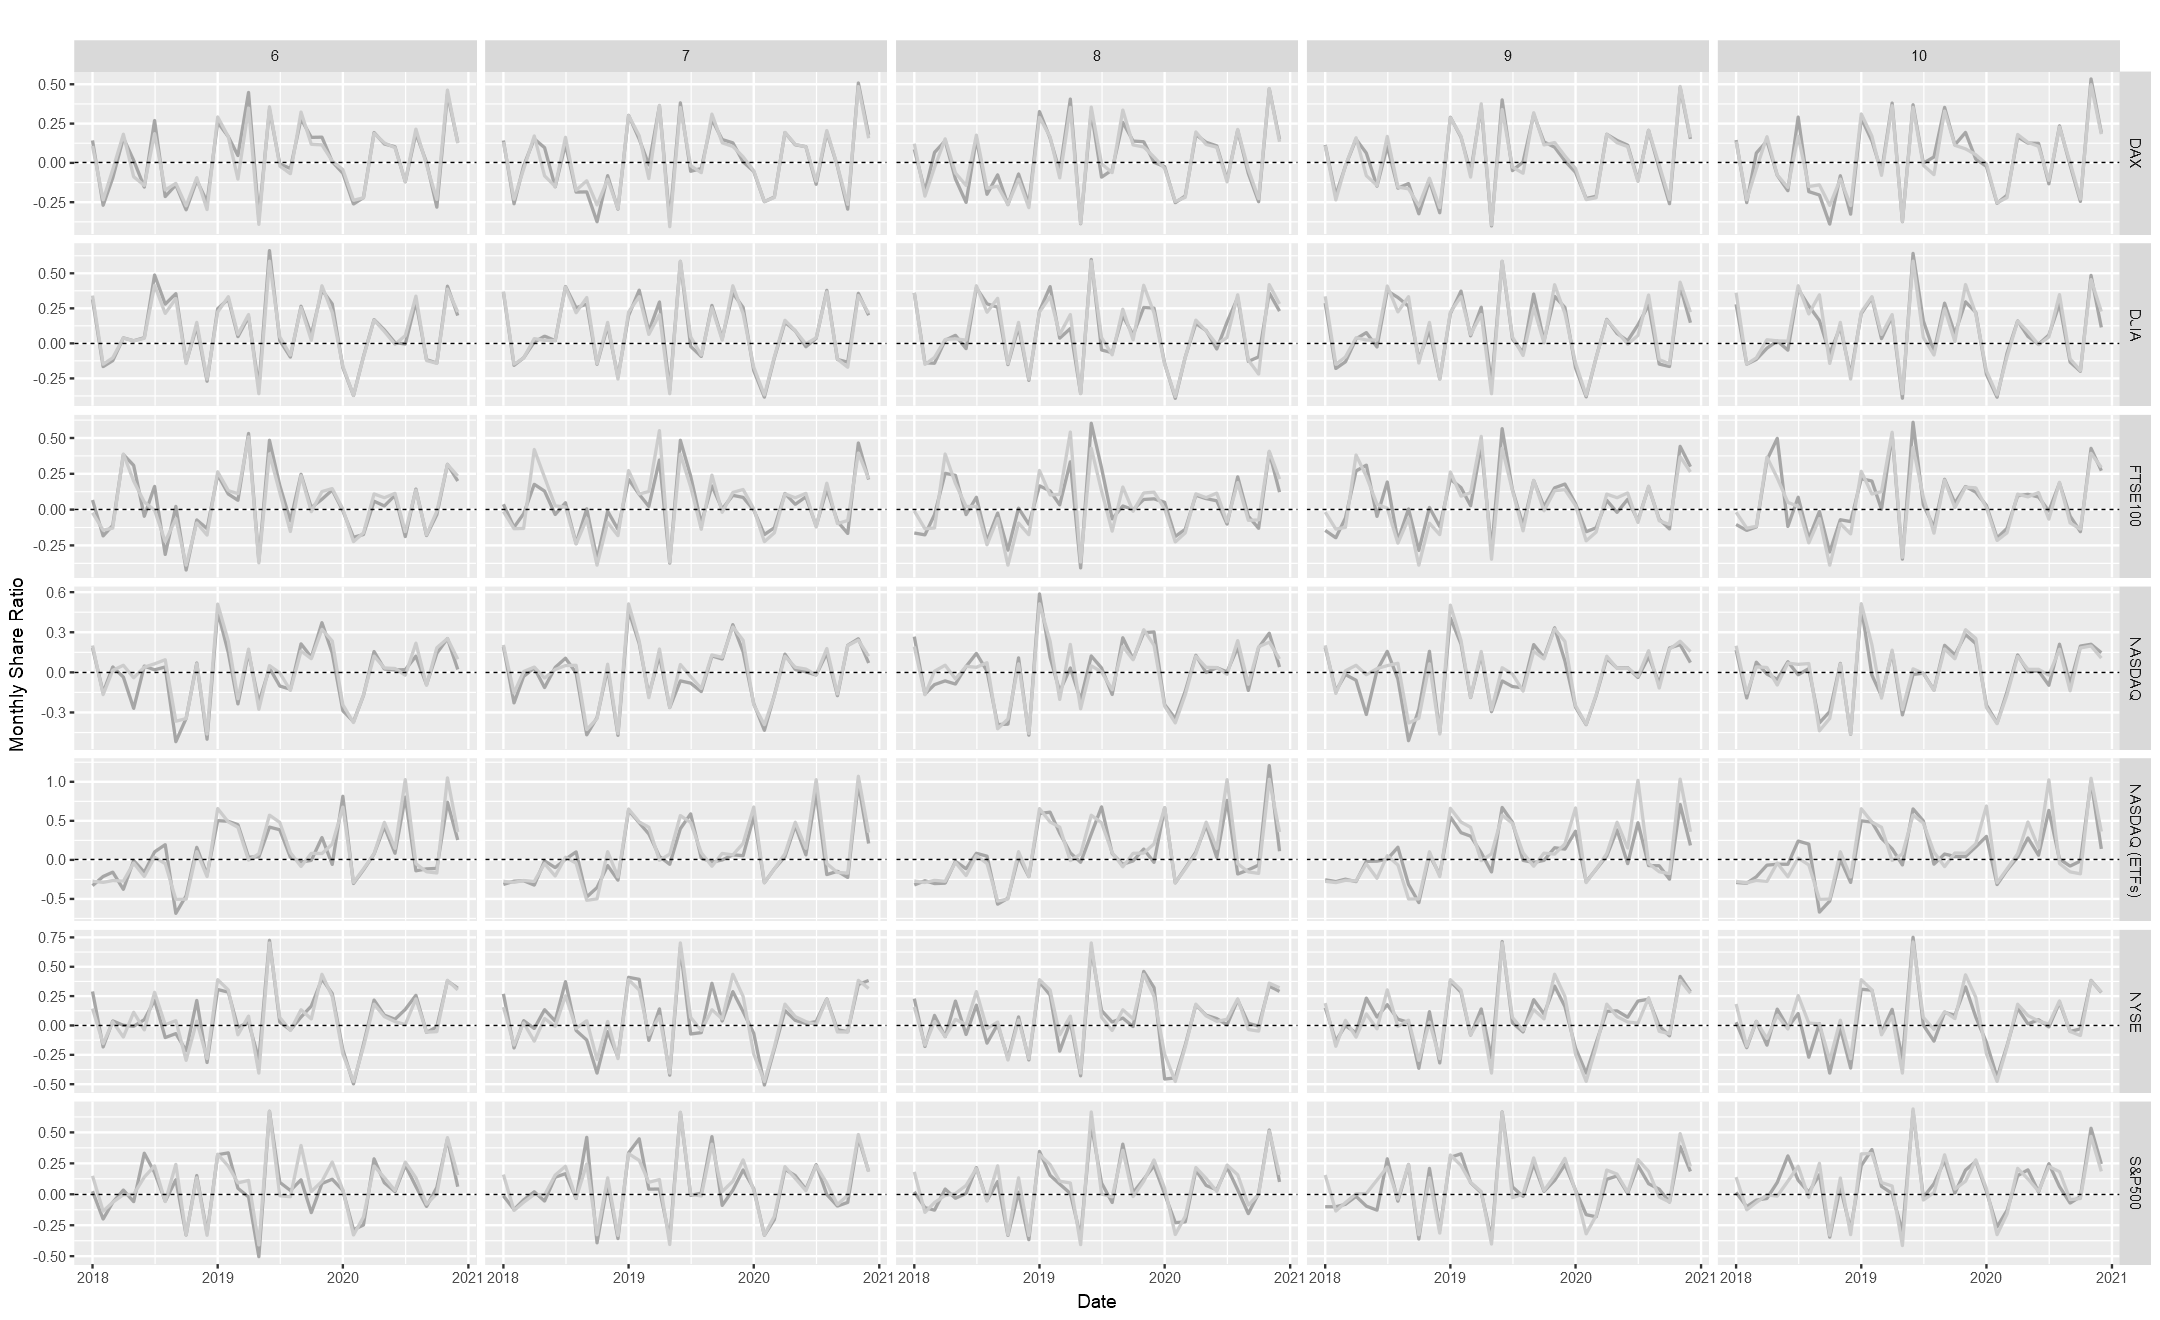

In [59]:
options(repr.plot.width=18, repr.plot.height=11)
p2 <- ggplot(base_sharpe_ratio %>% filter(Year %in% c(2018,2019,2020))  , aes(x=Date,y=Sharpe.Ratio,color=Model) )+
  geom_line(size=0.7) +
  #theme_minimal() +
  geom_hline(yintercept=0, linetype="dashed", color = "black", size=0.3) +
  #theme(legend.position="bottom",
  #      legend.title = element_blank(),
  #      legend.text = element_text(colour="black", size=12)) +
  labs(title="",x='Date',y='Monthly Share Ratio') +
  #facet_grid(top ~ .) 
  facet_grid(col=vars(Stocks_Selected), row=vars(Index), scale="free") +
  theme(legend.position="none",
        legend.box = "horizontal",
        legend.title = element_blank()) +
  scale_color_grey(start=0.65, end=0.8)
p2

In [60]:
png(file="Montly_SR_2018_to_2020_V2_cambios.png", width=1000, height=600)
p2
dev.off()

png 
  2

png 
  2

# Cumulative returns

In [46]:
head(base.portfolio.ret) 

,date,sorted_by,rebalance_period,base,top,MV,MV.LM,MV.EW
,<date>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,2007-01-03,mean,1,DJIA,6,0.0002747,0.0001536,0.0001536
2,2007-01-04,mean,1,DJIA,6,0.0287742,0.0171588,0.0171554
3,2007-01-05,mean,1,DJIA,6,-0.0322210,-0.0323645,-0.0323581
4,2007-01-08,mean,1,DJIA,6,0.0125763,0.0081426,0.0081409
5,2007-01-09,mean,1,DJIA,6,0.0200468,0.0066145,0.0066131
6,2007-01-10,mean,1,DJIA,6,0.0154800,0.0110762,0.0110740


In [47]:

base.ret <- base.portfolio.ret %>%
  gather(key='Modelo',value='return',-date, -sorted_by, -rebalance_period, -base, -top) %>% 
  filter(date < '2021-01-01', Modelo %in% c('MV', 'MV.LM'))

base.cum.ret <- base.portfolio.cum.ret %>%
  gather(key='Modelo',value='cumulative.return',-date, -sorted_by, -rebalance_period, -base, -top) %>% 
  filter(date < '2021-01-01', Modelo %in% c('MV', 'MV.LM'))



In [ ]:
base.portfolio.cum.ret %>% filter(date == max(date))

> ## Portfolio returns

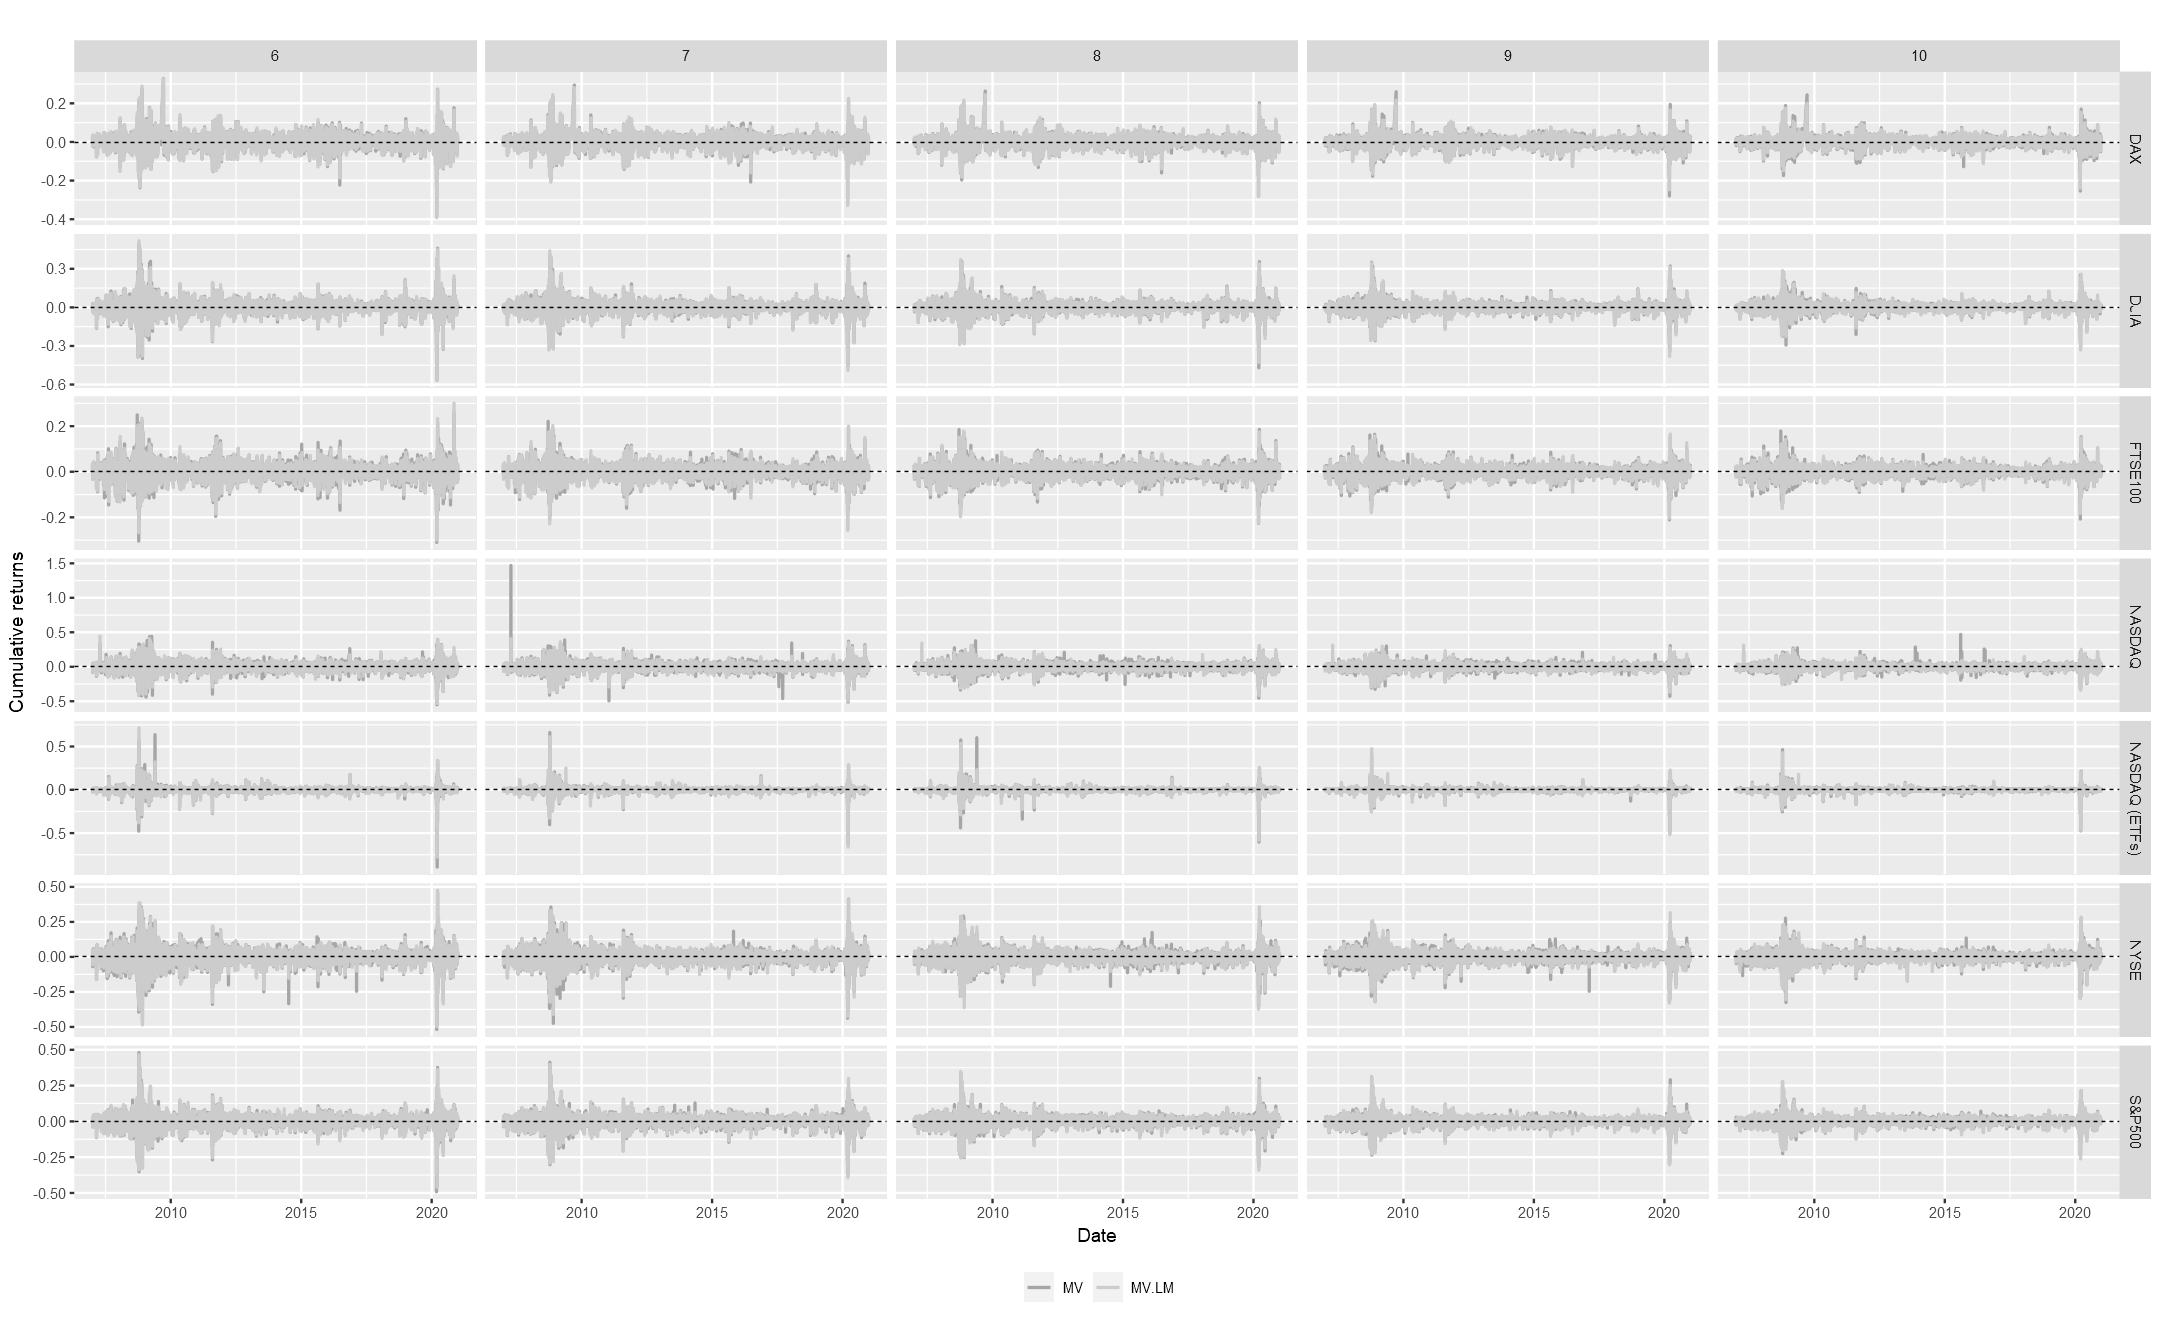

In [49]:
options(repr.plot.width=18, repr.plot.height=11)
p3 <- ggplot(base.ret  , aes(x=date,y=return,color=Modelo) )+
  geom_line(size=0.7) +
  #theme_minimal() +
  geom_hline(yintercept=0, linetype="dashed", color = "black", size=0.3) +
  #theme(legend.position="bottom",
  #      legend.title = element_blank(),
  #      legend.text = element_text(colour="black", size=12)) +
  labs(title="",x='Date',y='Cumulative returns') +
  #facet_grid(top ~ .) 
  facet_grid(col=vars(top), row=vars(base), scale="free") +
  theme(legend.position="bottom",
        legend.box = "horizontal",
        legend.title = element_blank()) +
  scale_color_grey(start=0.65, end=0.8)
p3

> # Cumulative returns

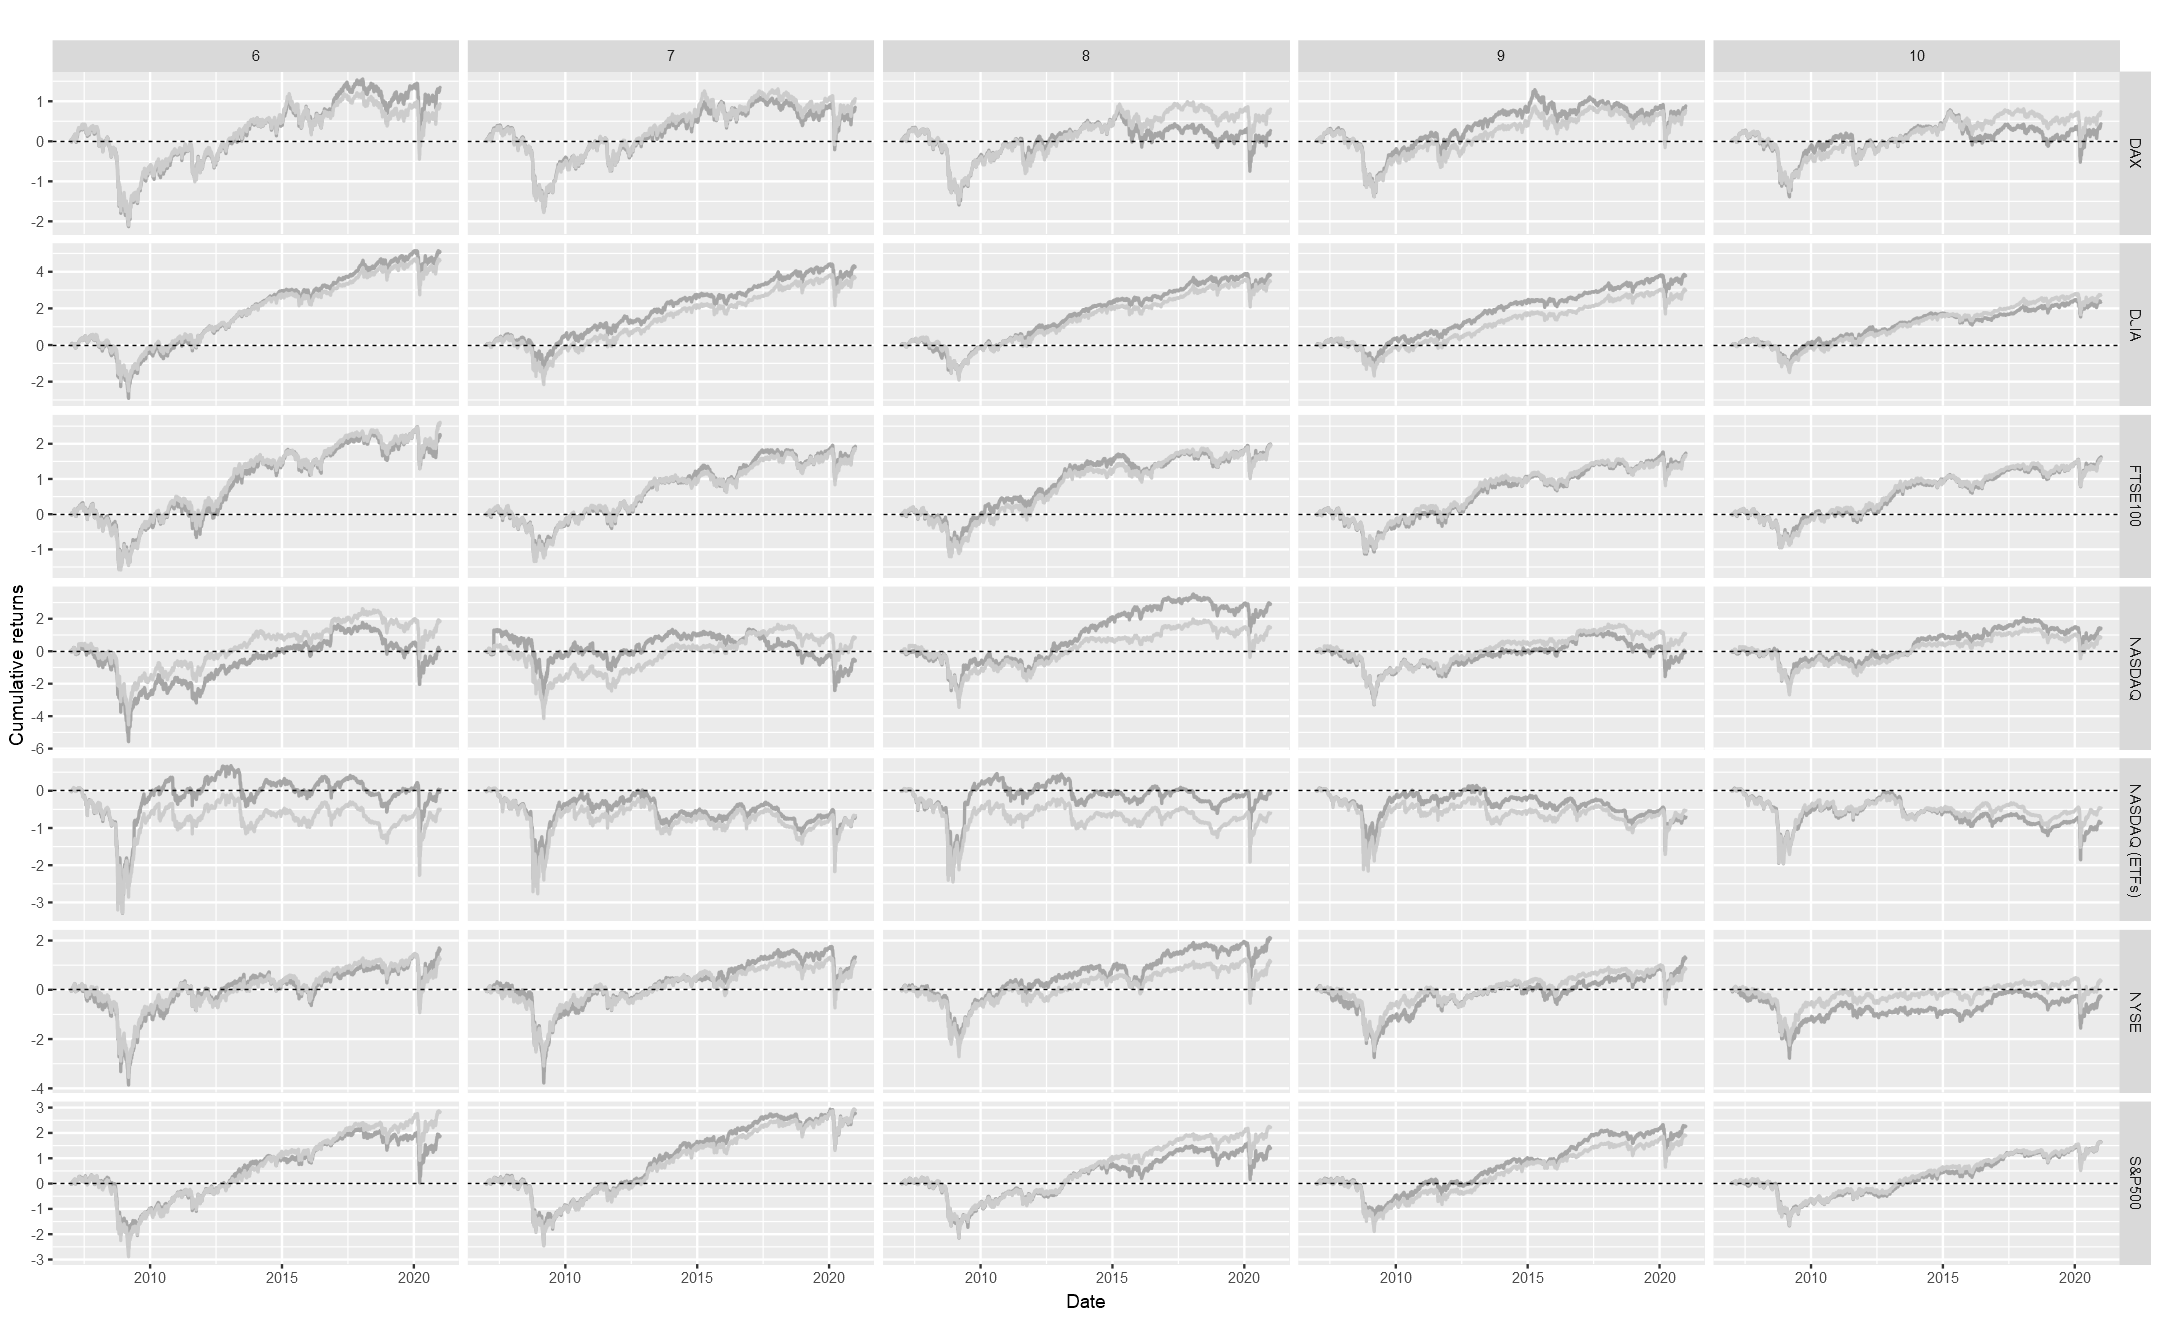

In [55]:
options(repr.plot.width=18, repr.plot.height=11)
p4 <- ggplot(base.cum.ret  , aes(x=date,y=cumulative.return,color=Modelo) )+
  geom_line(size=0.7) +
  #theme_minimal() +
  geom_hline(yintercept=0, linetype="dashed", color = "black", size=0.3) +
  #theme(legend.position="bottom",
  #      legend.title = element_blank(),
  #      legend.text = element_text(colour="black", size=12)) +
  labs(title="",x='Date',y='Cumulative returns') +
  #facet_grid(top ~ .) 
  facet_grid(col=vars(top), row=vars(base), scale="free") +
  theme(legend.position="none",
        legend.box = "horizontal",
        legend.title = element_blank()) +
  scale_color_grey(start=0.65, end=0.8)
p4

In [56]:
png(file="cumulative_returns_cambios.png", width=1000, height=600)
p4
dev.off()

png 
  2